<a href="https://colab.research.google.com/github/dkambarami/todo-app/blob/main/Housing_Price_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import sklearn.datasets as ds

In [41]:
house_prices  = ds.load_boston()
house_prices_df=pd.DataFrame(house_prices.data, columns=house_prices.feature_names)

In [42]:
house_prices_df['price']=house_prices['target']

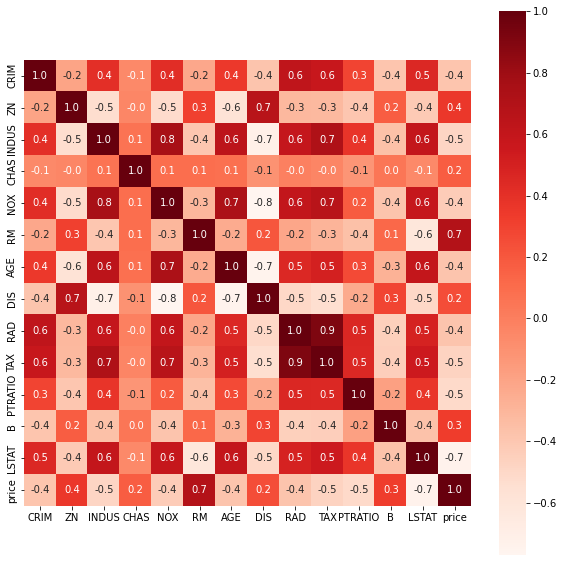

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(house_prices_df.corr(), cbar=True,square=True,fmt='.1f',annot=True, cmap='Reds')

In [44]:
X = house_prices_df.drop(columns='price', axis=1)
y = house_prices_df['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=2)

In [47]:
X_train.shape,  X_test.shape,  y_train.shape, y_test.shape 

((455, 13), (51, 13), (455,), (51,))

In [48]:
## Training the model
model_xg = XGBRegressor()

In [49]:
model_xg.fit(X_train, y_train)

[21:04:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [50]:
pred_train = model_xg.predict(X_train)

In [51]:
r2score=metrics.r2_score(pred_train, y_train)

In [52]:
mae = metrics.mean_absolute_error(pred_train, y_train)

In [53]:
print ("MAE :", mae, "R2 :{}", r2score)

MAE : 1.1363833708291524 R2 :{} 0.972342341480672


In [54]:
pred_test = model_xg.predict(X_test)  

In [55]:
r2score2=metrics.r2_score(pred_test,y_test)

In [56]:
mae2 = metrics.mean_absolute_error(pred_test, y_test)

In [57]:
print ("MAE :", mae2, "R2 :{}", r2score2)

MAE : 2.216113225151511 R2 :{} 0.8776582815404943


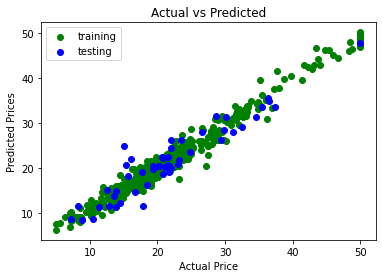

In [76]:
plt.scatter(y_train,pred_train,c='green', label='training')
plt.scatter(y_test,pred_test,c='blue',  label='testing')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted')
plt.legend(loc="upper left")
plt.show()